***Описание проекта***

Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.

    В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
    Задача

    Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

    Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2. Анализ A/B-теста

    Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

    Задача

    Проанализируйте A/B-тест:

    Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

    Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

    Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 

    Сделайте выводы и предположения.

    Постройте график кумулятивной конверсии по группам. 

    Сделайте выводы и предположения.

    Постройте график относительного изменения кумулятивной конверсии группы B к группе A. 

    Сделайте выводы и предположения.

    Постройте точечный график количества заказов по пользователям. 

    Сделайте выводы и предположения.

    Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 

    Выберите границу для определения аномальных пользователей.

    Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

    Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

    Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 

    Сделайте выводы и предположения.

    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

    Сделайте выводы и предположения.

    Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 

    Сделайте выводы и предположения.

    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

    Сделайте выводы и предположения.

    Примите решение по результатам теста и объясните его. 

***Варианты решений:***

    1. Остановить тест, зафиксировать победу одной из групп. 

    2. Остановить тест, зафиксировать отсутствие различий между группами. 

    3. Продолжить тест.

Описание данных

Данные для первой части

Файл /datasets/hypothesis.csv. Скачать датасет

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv. Скачать датасет

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis_p.csv'),  # описание гипотез
    pd.read_csv('orders_p.csv'),  # информация о заказах
    pd.read_csv('visitors_p.csv'),  # группы А/В теста
) 
except:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # описание гипотез
    pd.read_csv('/datasets/orders.csv'),  # информация о заказах
    pd.read_csv('/datasets/visitors.csv'),  # группы А/В теста
)

Посмотрим данные. Выведем первые пять строк и общую информацию от датафреймах.

In [3]:
print(hypothesis.head())
hypothesis.info()

   Unnamed: 0                                         Hypothesis  Reach  \
0           0  Добавить два новых канала привлечения трафика,...      3   
1           1  Запустить собственную службу доставки, что сок...      2   
2           2  Добавить блоки рекомендаций товаров на сайт ин...      8   
3           3  Изменить структура категорий, что увеличит кон...      8   
4           4  Изменить цвет фона главной страницы, чтобы уве...      3   

   Impact  Confidence  Efforts  
0      10           8        6  
1       5           4       10  
2       3           7        3  
3       3           3        8  
4       1           1        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9 non-null      int64 
 1   Hypothesis  9 non-null      object
 2   Reach       9 non-null      int64 
 3   Impact      9 non-null      int64 
 4   Confid

In [4]:
print(orders.head())
orders.info()

   Unnamed: 0  transactionId   visitorId        date  revenue group
0           0     3667963787  3312258926  2019-08-15     1650     B
1           1     2804400009  3642806036  2019-08-15      730     B
2           2     2961555356  4069496402  2019-08-15      400     A
3           3     3797467345  1196621759  2019-08-15     9759     B
4           4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1197 non-null   int64 
 1   transactionId  1197 non-null   int64 
 2   visitorId      1197 non-null   int64 
 3   date           1197 non-null   object
 4   revenue        1197 non-null   int64 
 5   group          1197 non-null   object
dtypes: int64(4), object(2)
memory usage: 56.2+ KB


In [5]:
print(visitors.head())
visitors.info()

   Unnamed: 0        date group  visitors
0           0  2019-08-01     A       719
1           1  2019-08-02     A       619
2           2  2019-08-03     A       507
3           3  2019-08-04     A       717
4           4  2019-08-05     A       756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62 non-null     int64 
 1   date        62 non-null     object
 2   group       62 non-null     object
 3   visitors    62 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ KB


**Проверим данные перед началом работы с ними:**

Проверим наличие явных дубликатов

In [6]:
orders.duplicated().sum()

0

In [7]:
visitors.duplicated().sum()

0

Проверяем наличие пропусков и их количество

In [8]:
print(orders.isna().sum()) 

Unnamed: 0       0
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [9]:
print(visitors.isna().sum())

Unnamed: 0    0
date          0
group         0
visitors      0
dtype: int64


Данные не содержат ни дубликатов, ни пропусков.

Проверим сколько и каких групп участвовало в тесте:

In [10]:
orders.group.unique()

array(['B', 'A'], dtype=object)

Имеем две группы: А и В

Определим даты начала и окончания теста

In [11]:
min_data = orders.date.min()
max_data = orders.date.max()
print('Дата начала теста: ', min_data)
print('Дата окончания теста: ', max_data)

Дата начала теста:  2019-08-01
Дата окончания теста:  2019-08-31


Определим количество пользователей в каждой группе   

In [12]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

Проверим нет ли пользователей, которые попали в обе группы

In [13]:
orders_a = orders[orders['group']=='A']
orders_b = orders[orders['group']=='B']
srez_id = pd.merge(orders_a, orders_b, on=['visitorId'], how='inner')
srez_id

,Unnamed: 0_x,transactionId_x,visitorId,date_x,revenue_x,group_x,Unnamed: 0_y,transactionId_y,date_y,revenue_y,group_y
0,2,2961555356,4069496402,2019-08-15,400,A,1070,1473132782,2019-08-12,640,B
1,26,2223239646,199603092,2019-08-15,3488,A,246,437656952,2019-08-02,3488,B
2,134,62794304,199603092,2019-08-22,6976,A,246,437656952,2019-08-02,3488,B
3,823,2971973105,199603092,2019-08-27,2790,A,246,437656952,2019-08-02,3488,B
4,1102,1941707234,199603092,2019-08-12,6438,A,246,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...,...,...
178,1167,3757656646,4186807279,2019-08-14,4990,A,814,1759418862,2019-08-21,18560,B
179,1167,3757656646,4186807279,2019-08-14,4990,A,819,380064637,2019-08-27,13740,B
180,1173,3612788481,2712142231,2019-08-14,2490,A,61,1251767592,2019-08-16,790,B
181,1178,4052155355,2949041841,2019-08-14,190,A,1184,1329499668,2019-08-14,10380,B


In [14]:
print('Количисество пользователей, которые попали в обе группы: ', len(srez_id['visitorId'].unique()))

Количисество пользователей, которые попали в обе группы:  58


In [15]:
orders = orders[np.logical_not(orders['visitorId'].isin(srez_id['visitorId']))]

In [16]:
orders.group.value_counts()

B    548
A    468
Name: group, dtype: int64

### Промежуточный вывод:
Были выявлены пользователи, которые попали в обе группы. Их количество около 15% от общего числа, но для чистоты эксперемента мы вынуждены от них избавиться. 

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Для приоритизации гипотез мы применим два метода ICE и RICE. 

ICE учитывает такие параметры, как влияние, уверенность, усилия. 

И его модификацию RICE, в котором появляется дополнительный параметр "охват", который отражает сколько пользователей затронет изменение, которые мы хотим внести.

In [17]:
pd.set_option('max_colwidth', None)
display(hypothesis.head(10))

,Unnamed: 0,Hypothesis,Reach,Impact,Confidence,Efforts
0,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируйте их по убыванию приоритета.

In [18]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [19]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Первые четыре гипотезы распределились в следующем порядке:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   

- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   

Картина изменилась: три гипотезы остались, но поменялись местами, а на месте "Запустить акцию, дающую скидку на товар в день рождения"  теперь  "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"

Этого можно было ожидать, так как у последней показатель Reach 8 , а у Акции 1.

In [20]:
hypothesis.sort_values(by='RICE', ascending=False)

,Unnamed: 0,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Видим, что в RICE на первые позиции вишли гипотезы, которые имеют высокие первые три параметра, что позволило отодвинуть вниз гипотезы у которых низкий "охват" (Reach) и высокий показатель "усилия"(Efforts)

#### Часть 2. Анализ A/B-теста



Задача




Постройте точечный график количества заказов по пользователям. 

Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 

Выберите границу для определения аномальных пользователей.

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 

Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. 

Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.


#### Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Проанализируем A/B-тест:



In [21]:
print(orders.head(5))
print(visitors.head(5))

   Unnamed: 0  transactionId   visitorId        date  revenue group
0           0     3667963787  3312258926  2019-08-15     1650     B
1           1     2804400009  3642806036  2019-08-15      730     B
3           3     3797467345  1196621759  2019-08-15     9759     B
4           4     2282983706  2322279887  2019-08-15     2308     B
5           5      182168103   935554773  2019-08-15     2210     B
   Unnamed: 0        date group  visitors
0           0  2019-08-01     A       719
1           1  2019-08-02     A       619
2           2  2019-08-03     A       507
3           3  2019-08-04     A       717
4           4  2019-08-05     A       756


Создадим массив уникальных пар значений дат и групп теста

In [22]:
dates_groups = orders[['date', 'group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах 

In [23]:
orders_agg_regated = dates_groups.apply(lambda x:
                                        orders[np.logical_and(orders['date'] <= x['date'],
                                                              orders['group'] == x['group'])].agg(
                                            {'date' : 'max',
                                             'group' : 'max',
                                             'transactionId' : 'nunique',
                                             'visitorId' : 'nunique',
                                             'revenue' : 'sum'}
                                        ), axis=1).sort_values(by=['date','group'])


Получим агрегированные кумулятивные по дням данные о посетителях

In [24]:
visitors_agg_regated = dates_groups.apply(lambda x:
                                          visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                  visitors['group'] == x['group'])].agg(
                                              {'date' : 'max',
                                               'group' : 'max',
                                               'visitors' : 'sum'}
                                          ), axis=1).sort_values(by=['date','group'])

Объединим кумулятивные данные в одной таблице и присвоим ее столбцам другие имена

In [25]:
cumulative_data = orders_agg_regated.merge(visitors_agg_regated,
                                           left_on=['date', 'group'],
                                           right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

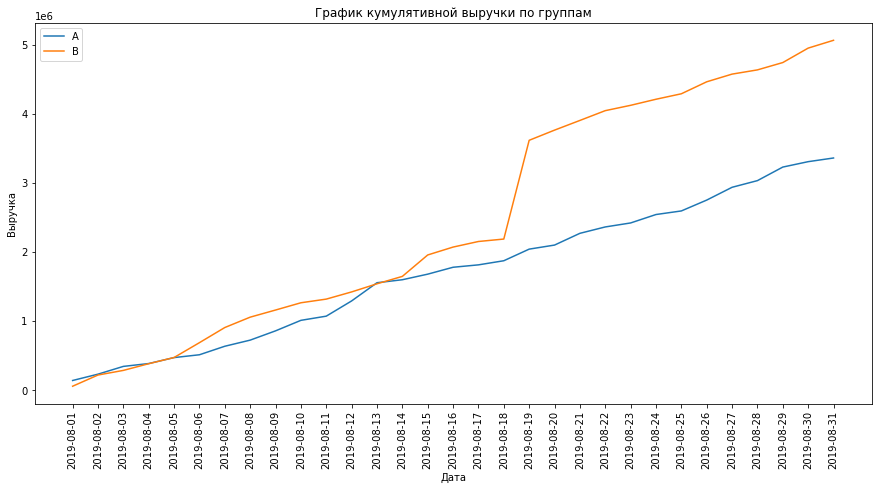

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по группам')
plt.show()

###### Промежуточный вывод:

В течении всего теста выручка растет. В некоторых точках выручка обеих групп растут. Особенно это заметно в группе В.

Возможно речь идет о всплесках числа заказов, появлении дорогих заказах или какие-то еще факторы. 

При этом, в обоих группах к концу тестирования выручка стабилизируется и в группе В она значительно больше чем в А.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

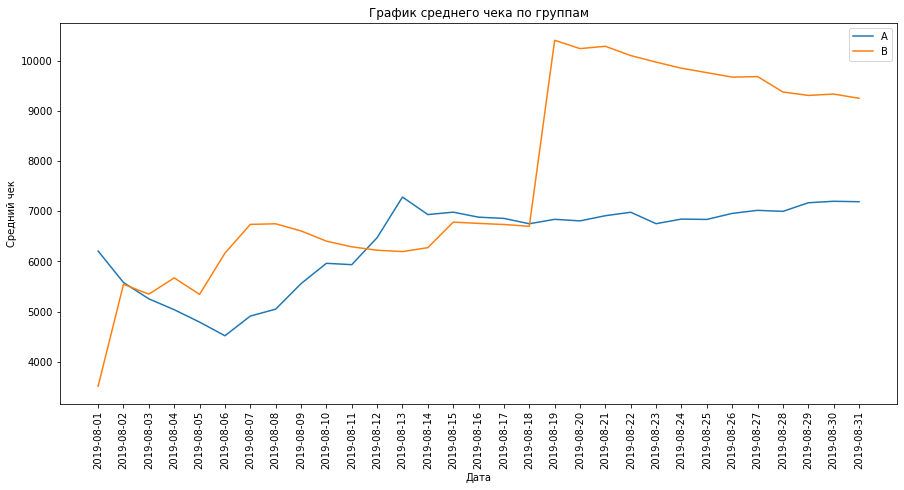

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График среднего чека по группам')
plt.xticks(rotation=90)
plt.show()

###### Промежуточный вывод:
К концу теста средний чек в группе А стабилизируется, но заметно проигрывает.

В группе В средний чек после резког роста тоже стабилизируется с небольшим снижением. Возможно в какой-то момент что-то произошло с этой группой, что так сильно повлияло на средний чек и на выручку.

Возможно, группе нужно больше времени, чтобы картина стабилизировалась и мы получили реальные значения метрик.

Построим график относительного различия для среднего чека.

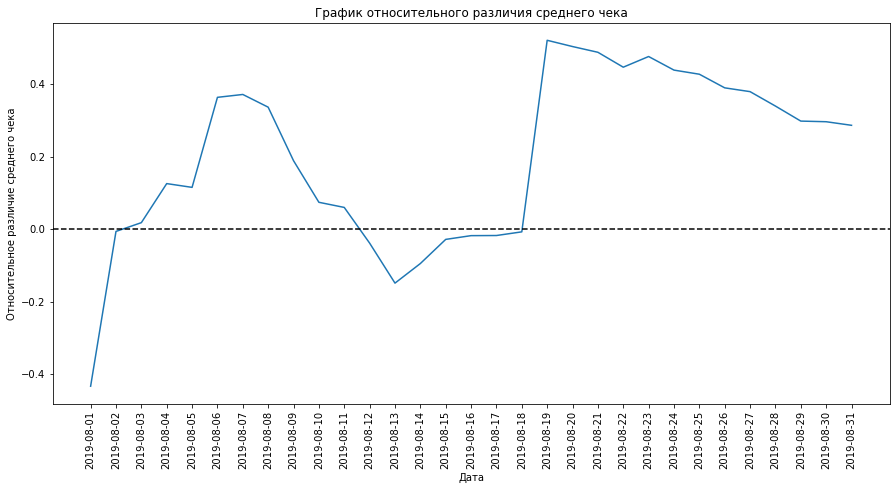

In [28]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(15, 7))
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/
          merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/
          merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.ylabel('Относительное различие среднего чека')
plt.xlabel('Дата')
plt.title('График относительного различия среднего чека')
plt.xticks(rotation=90)
plt.show()


###### Промежуточный вывод:
В нескольких точка график различия резко "скачет". С большой долей вероятности, можно ожидать выбросы и крупные заказы. 

Дальше постараемся их найти.

Проанализируем график кумулятивной конверсии

In [29]:
print(orders.date.min(), orders.date.max())

2019-08-01 2019-08-31


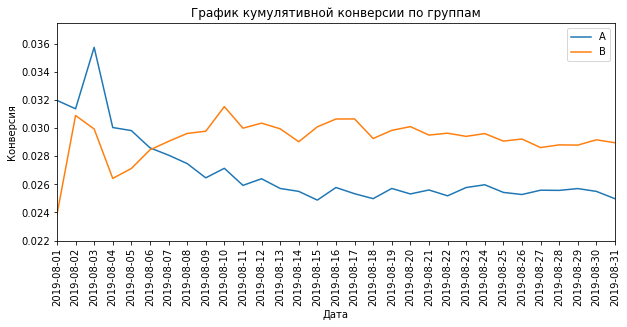

In [30]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(10, 4))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.title('График кумулятивной конверсии по группам')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.022, 0.0375])
plt.xticks(rotation=90)
plt.show()

###### Промежуточный вывод:
Конверсии обеих групп после значительных колебаний в начале, после середины тестирования стабилизировались,

при этом, конверсия группы В осталась больше.

Построим график относительного различия кумулятивных конверсий:

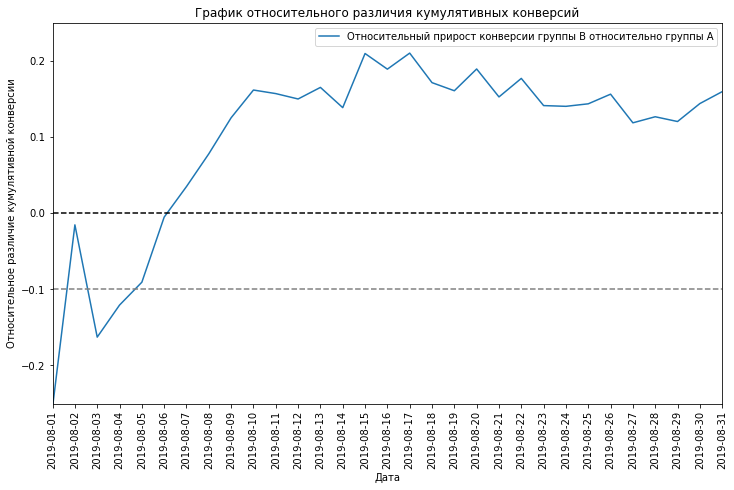

In [31]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

plt.figure(figsize=(12, 7))
plt.plot(
    merged_cumulative_conversions['date'],
    merged_cumulative_conversions['conversionB']/
    merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.25, 0.25]) 
plt.ylabel('Относительное различие кумулятивной конверсии')
plt.xlabel('Дата')
plt.title('График относительного различия кумулятивных конверсий')
plt.xticks(rotation=90)
plt.show()

###### Промежуточный вывод:
В начале теста конверсия группы В уступала, но, достаточно быстро вырвалась вперед и весь оставшийся период тестирования уверенно лидировала. Не будем спешить с окончательными выводами. Изучим аномалии, возможно они добавят понимания к общей картине.




Построим точечный график количества заказов по пользователям.

In [32]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


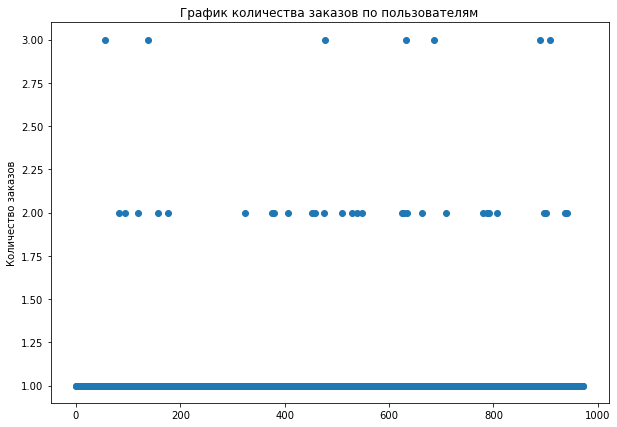

In [33]:
x_values = pd.Series(range(0,len(orders_by_users['orders'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders_by_users['orders'])

plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям')
plt.show()

###### Промежуточный вывод:
Видим, что есть несколько покупателей, которые совершили более 6 заказов. Больше всего клиентов сделали от 1 до 3 заказов. Пока мы не видим их точную долю и не можем принять однозначное решение, что будем считать аномалиями.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [34]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


###### Промежуточный вывод:
Не более чем 5% покупателей сделали более 2 заказов и не более 1% сделали более 4 заказов.

Возьмем 2 заказа на одного пользователя за верхнюю границу числа заказов и в дальнейшем отсеем аномальные значения по ней.


Построим точечный график стоимостей заказов.

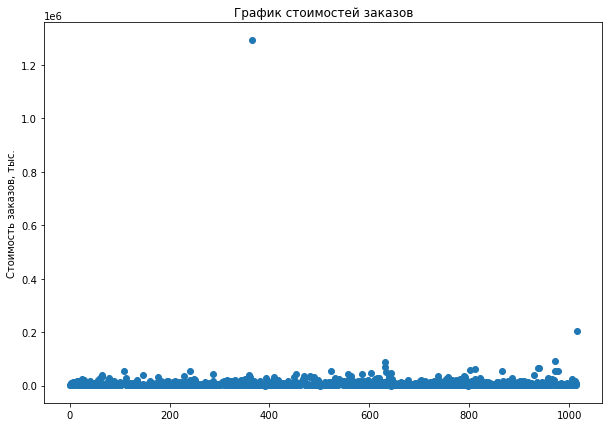

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue'])

plt.ylabel('Стоимость заказов, тыс.')
plt.title('График стоимостей заказов')
plt.show()

###### Промежуточный вывод:
Имеем два явно дорогих заказа. Стоимость остальных заказов уложилась в диапазоне до 150 000
Посчитаем 95-й и 99-й перцентили стоимости заказов, чтобы более точно определить границу аномальных значений.

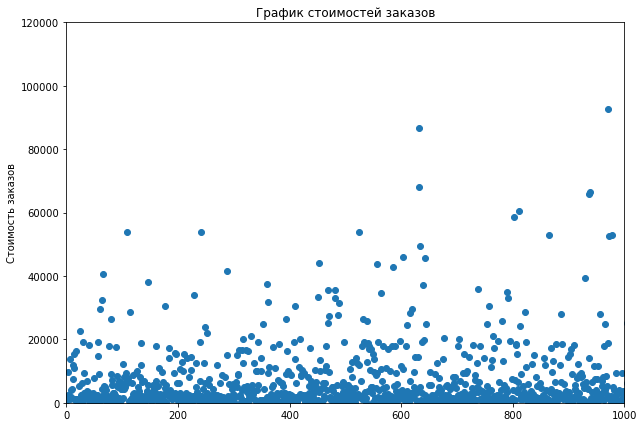

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1000, 0, 120000]) 
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов')
plt.show()

При такой визиуализации видим, что стоимость заказов в основном укладывается в сумму до 40 000 и лишь единицы заказазов стоят дороже.

In [37]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


###### Промежуточный вывод:
Стоимость 95% процентов заказов не превышает 26785, стоимоть 99% не превышает 53904. Можем принять за границу аномальных значения 28 000.

##### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 


Нулевая гипотеза: Различий в конверсии между группами нет. 

Альтернативная гипотеза: Различия в конверсии между группами есть.

Передадим критерею mannwhitneyu() данные о конверсии.
Дополнительно найдём относительные различия в конверсии между группами:

In [38]:
print('p-value: ', '{0:.3f}'.format(stats.mannwhitneyu(cumulative_data[cumulative_data['group']=='A']['conversion'], cumulative_data[cumulative_data['group']=='B']['conversion'])[1]))
print('Относительные резличия в конверсии между группами: ', '{0:.3f}'.format(cumulative_data[cumulative_data['group']=='B']['conversion'].mean()/cumulative_data[cumulative_data['group']=='A']['conversion'].mean()-1)) 

p-value:  0.000
Относительные резличия в конверсии между группами:  0.090


###### Промежуточный вывод:
P-value равен 0.00. Значит, отвергаем нулевую гипотезу и считаем, что в конверсии между группами есть различия.

Мы видим, что конверсия группы B выше конверсии группы A более, чем на 10%.

Подготовим выборки количества заказов по пользователям по группам теста:

##### Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [39]:
visitors_A = visitors[visitors['group'] == 'A']
visitors_B = visitors[visitors['group'] == 'B']    

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']



sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима')
else:
    print('По неочищенным данным различий в конверсии групп A и B нет')

Относительный прирост конверсии группы B по отношению к группе A: 0.160
P-value: 0.011018084110014696
По неочищенным данным в конверсии групп A и B разница статистически значима


 Мы отвергаем гипотезу о равенстве конверсий в группах А и В.
 
 Относительный прирост конверсии в группе В 16%


#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть.

Передадим критерею mannwhitneyu() данные о выручке с заказов.
Дополнительно найдём относительные различия в среднем чеке между группами:


In [41]:
print('p-value: ', '{0:.3f}'.format(
    stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'],
        orders[orders['group']=='B']['revenue'])[1])
     )
print('Относительные резличия в среднем чеке между группами: ', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1)
     ) 

p-value:  0.829
Относительные резличия в среднем чеке между группами:  0.287


###### Промежуточный вывод:
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Впрочем, средний чек группы B значительно выше среднего чека группы A.



#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Ранее мы приняли за границы анамальных данных следующие значения:

Количество заказов на одного пользователя 2, так как не более чем 5% покупателей сделали более 2 заказов.

Далее за границу анамольной суммы заказа принимаю 26 785, так как , стоимость 95% процентов заказов не превышает 26 785.

Сделаем срезы по покупателям, которые сделали более двух заказов и по покупателям, которые сделали заказ более, чем на 26 785.

In [42]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders_by_users['orders'], [99])[0]]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders_by_users['orders'], [99])[0]]['user_id'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

print(abnormalUsers.shape[0]) 


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
58


Всего 58 аномальных пользователя.
Узнаем, как их действия повлияли на результаты теста. 


 Подготовим выборки количества заказов по пользователям по группам теста по очищенным данным:

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [44]:
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(
    sampleBFiltered.mean()/
    sampleAFiltered.mean()-1)
     )
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B разница статистически значима')
else:
    print('По очищенным данным различий в конверсии групп A и B нет')

Относительный прирост конверсии группы B по отношению к группе A: 0.182
P-value: 0.011
По очищенным данным в конверсии групп A и B разница статистически значима


Мы отвергаем нулевую гипотезу о равенстве конверсий!

###### Промежуточный вывод:
В очищенных данных получили другие значения, но общий вывод остается прежним.

P-value равен 0.011. Значит, отвергаем нулевую гипотезу и считаем, что в конверсии между группами есть различия.

Мы видим, что конверсия группы B выше конверсии группы A на 18%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [45]:
print('p-value: ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия в среднем чеке: '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value:  0.646
Относительные различия в среднем чеке: -0.048


###### Промежуточный вывод:
P-value немнго изменился, но по-прежнему значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

А вот средний чек группы В по очищенным данным стал немного меньше чем в группе А.



### Вывод

По результатам обработки сырых данных мы получили следующие результаты:

1. В течении всего теста выручка растет. В некоторых точках выручка обеих групп резко растут. Особенно это заметно в группе В. При этом, в обоих группах к концу тестирования выручка стабилизируется и в группе В она значительно больше чем в А.


2. К концу теста средний чек в группе А стабилизируется, но заметно проигрывает. В группе В средний чек после резкого роста тоже стабилизируется с небольшим снижением. Возможно в какой-то момент что-то произошло с этой группой, что так сильно повлияло на средний чек и на выручку.


3. Конверсии обеих групп после значительных колебаний в начале, после середины тестированя стабилизировались, при этом, конверсия групп В осталась больше.


4. В начале теста конверсия группы В уступала, но, достаточно быстро вырвалась вперед и весь оставшийся период тестирования уверенно лидировала. Не будем спешить с окончательными выводами. Изучим аномалии, возможно они добавят понимания к общей картине.

#### Изучив данные мы увидели, что:

- что есть несколько покупателей, которые совершили более 6 заказов. Больше всего клиентов сделали от 1 до 3 заказов. Пока мы не видим их точную долю и не можем принять однозначное решение, что будем считать аномалиями.

При этом, 

Не более чем 5% покупателей сделали более 2 заказов и не более 1% сделали более 4 заказов.




- Стоимость большинства заказов уложилась в диапазоне до 150 000

Посчитав 95-й и 99-й перцентили стоимости заказов мы выяснили, что

Стоимость 95% процентов заказов не превышает 26 785, стоимоть 99% не превышает 58 233.2. 

#### Нами были выбраны границы анамальных значений:

Более 2 заказов на одного пользователя,

Сумма одного заказа более 26 785.


###### Проверив статистическую значимость различий в конверсии между группами по «сырым» данным получили:
P-value равен 0.00. Мы отвергаем нулевую гипотезу и принялии, что в конверсии между группами есть различия.

Так же видим, что конверсия группы B выше конверсии группы A более, чем на 10%.


###### Проверив статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным получили:
P-value = 0.729 - это значительно больше 0.05. Мы не смогли отвергнуть нулевую гипотезу и считаем, что в среднем чеке  различий нет. 

Впрочем, средний чек группы B значительно выше среднего чека группы A.
0.259



#####  Сделав срезы данных по границам анамальных значений еще раз проверили статистическую значимость различий в конверсии и в среднем чеке между группами:

###### Статистическая значимость различий в конверсии между группами по очищенным данным:

Получили те же цифры, что и после сырых данных. 

P-value равен 0.00. Значит, отвергаем нулевую гипотезу и считаем, что в конверсии между группами есть различия.

Мы видим, что конверсия группы B выше конверсии группы A более, чем на 10%.

###### Можно утверждать, что в конверсии между группами есть различия. Конверсия во группе В выше, чем в группе А.


###### Статистическая значимость различий в среднем чеке между группами по очищенным данным:

P-value = 0.738  немного изменился, но по-прежнему значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

А вот средний чек группы В по очищенным данным стал немного меньше чем в группе А.




## В итоге мы имеем следующие факты:
- В конверсии между группами есть есть статистически значимое различие, как по "сырым" данным, так и после фильтрации.

- Нет статистически значимого различия по среднему чеку между группами ни по "сырым" данным. ни по данным после фильтрации.

- График различия конверсий между группами сообщает, что результаты группы В лучше группы А, при этом показатели в обеих группах под конец стабилизировались.

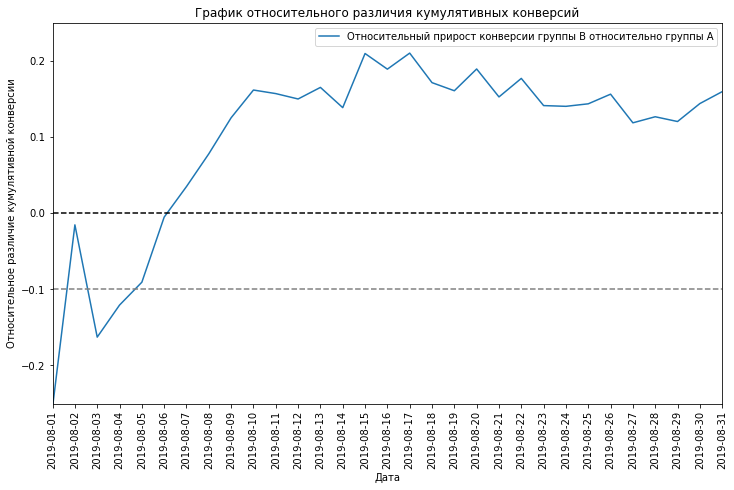

In [46]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

plt.figure(figsize=(12, 7))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.25, 0.25]) 
plt.ylabel('Относительное различие кумулятивной конверсии')
plt.xlabel('Дата')
plt.title('График относительного различия кумулятивных конверсий')
plt.xticks(rotation=90)
plt.show()


Можно с определенной долей уверенности утвержадать, что в конверсии между группами есть есть статистически значимое различие
и конверсия в группе В на 10% выше, чем в группе А.

При этом с среднем чеке статистически значимых различий между группами нет.
### Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы